In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Teorema Central del límite

### Distribución exponencial 

**PDF**:

$f(y;\lambda) = \lambda e^{-\lambda y}  \hspace{1cm} \lambda > 0$

con

- $\text{E}(Y) = \frac{1}{\lambda}$
- $\text{var}(Y) = \frac{1}{\lambda^2}$

In [2]:
l = 1/2
#Ej 9 a)

#un solo experimento
x1,x2 = stats.expon.rvs(scale=1/l,size = 2)

x_mean_2 = np.mean([x1,x2])

print('x1 =',x1)
print('x2 =',x2)
print('x_mean =',x_mean_2)

x1 = 7.938051179747916
x2 = 0.8418566963195985
x_mean = 4.3899539380337576


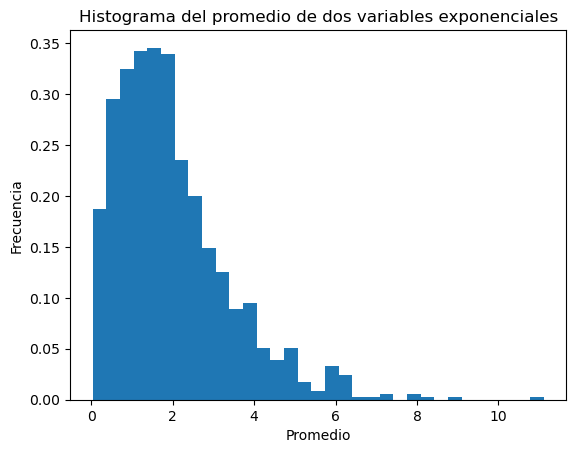

In [3]:
# 1000 experimentos

n = 1000

x_means_2 = []
for i in range(n):
    x1,x2 = stats.expon.rvs(scale=1/l,size = 2)
    x_mean_2 = np.mean([x1,x2])
    x_means_2.append(x_mean_2)

plt.hist(x_means_2, bins='auto', density=True)
plt.title('Histograma del promedio de dos variables exponenciales')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.show()

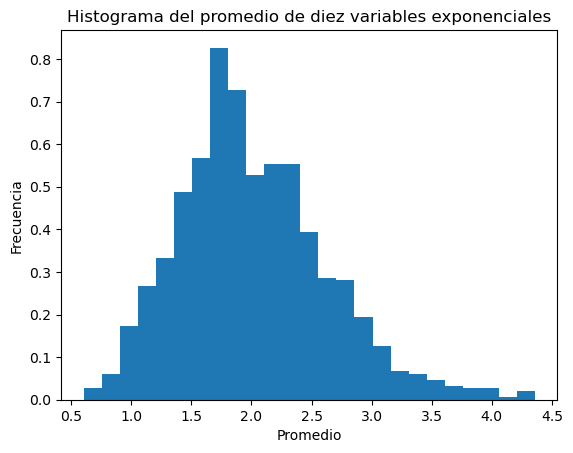

In [4]:
# b) Genero 10 observaciones y guardo el promedio. Repito 10 veces

n = 1000

x_means_10 = []
for i in range(n):
    samples = stats.expon.rvs(scale=1/l,size = 10)
    x_mean_10 = np.mean(samples)
    x_means_10.append(x_mean_10)

# Crear histograma
plt.hist(x_means_10, bins='auto', density=True)
plt.title('Histograma del promedio de diez variables exponenciales')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.show()

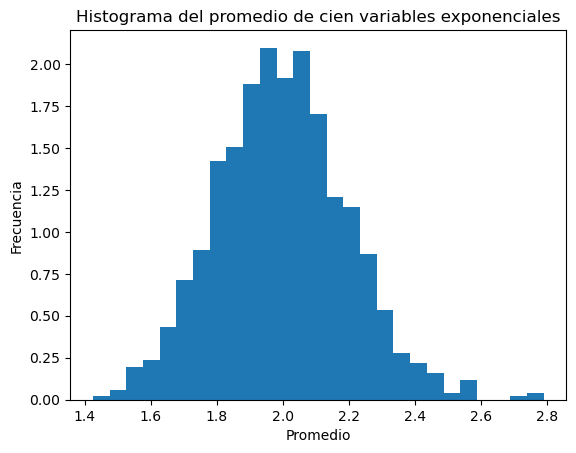

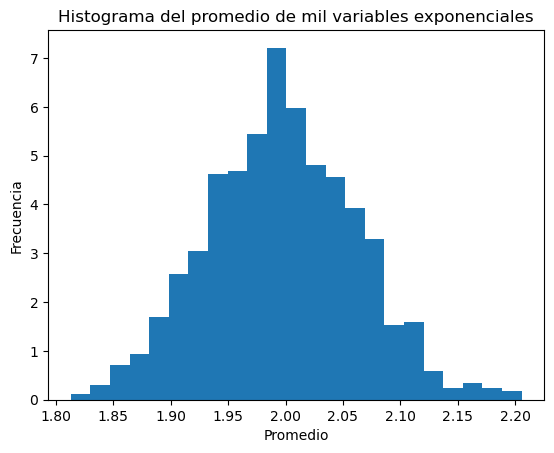

In [6]:
# C) Idem para 100 y 1000 observaciones


x_means_100 = []
for i in range(n):
    samples = stats.expon.rvs(scale=1/l,size = 100)
    x_mean_100 = np.mean(samples)
    x_means_100.append(x_mean_100)


x_means_1000 = []
for i in range(n):
    samples = stats.expon.rvs(scale=1/l,size = 1000)
    x_mean_1000 = np.mean(samples)
    x_means_1000.append(x_mean_1000)


plt.hist(x_means_100, bins='auto', density=True)
plt.title('Histograma del promedio de cien variables exponenciales')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.show()

plt.hist(x_means_1000, bins='auto', density=True)
plt.title('Histograma del promedio de mil variables exponenciales')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.show()

## TCL

Sean $X_1,X_2,...$ variables independientes e identicamente distribuidas (iid) con $\text{E}(X_i) = \mu$ y $\text{var}(X_i) = \sigma^2$, (solamente necesito que tengan la misma media y varianza, no necesito que hasta sean la misma distribucion) entonces si $n$ es lo suficientemente grande:

<!-- $$\bar{X}_n \sim N(\mu, \frac{\sigma}{\sqrt{n}}) $$ ó -->
 el promedio de Xn aproxima con una Normal(MU, (SIGMA/RAIZ(N))) 
 
 el promedio esta distribuido como una Normal con la misma media que cada una de las varioables y la desvio estandar

$$\frac{\bar{X}_n-\mu}{\sigma/\sqrt{n}} \sim N(0,1)$$ 


¿Por qué el $\sqrt{n}$?


¿Cuáles son en este caso la esperanza y la varianza de $\bar{X}_n$? Son las mismas que en la distribucion, la esperanza es la media de la normal resultante y la varianza es el desvio de la normal


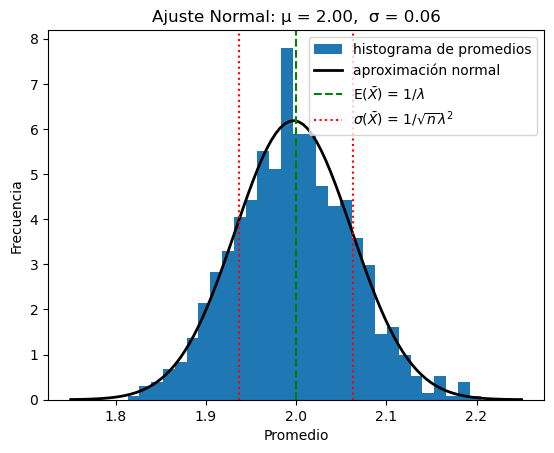

In [7]:
from scipy.stats import norm

mu = np.mean(x_means_1000)
sigma = np.std(x_means_1000)

plt.hist(x_means_1000, bins=30, density=True,label='histograma de promedios')

# Superponer la distribución normal
x = np.linspace(1.75, 2.25, 100)
normal = norm.pdf(x, mu, sigma)

plt.plot(x, normal, 'k', linewidth=2,label='aproximación normal')
title = "Ajuste Normal: μ = %.2f,  σ = %.2f" % (mu, sigma)
plt.axvline(1/l,ls='--',color='green',label = r'E($\bar{X}$) = 1/$\lambda$')
plt.axvline(1/l+1/np.sqrt(n)/l,ls=':',color='red',label = r'$\sigma$($\bar{X}$) = 1/$\sqrt{n}\lambda^2$')
plt.axvline(1/l-1/np.sqrt(n)/l,ls=':',color='red')
plt.title(title)
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


## Ejercicio: rehacer el problema pero con una distribución Bernoulli

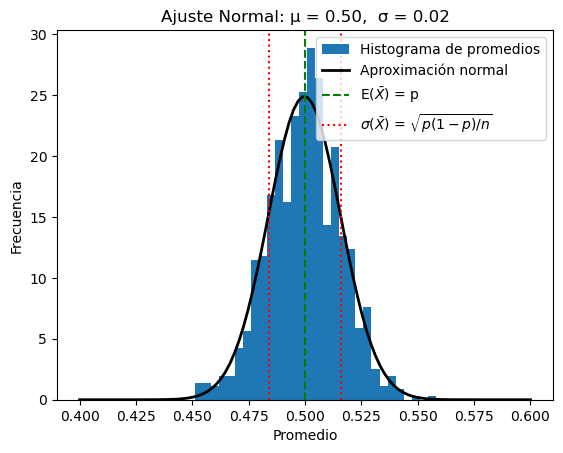

In [8]:
n= 1000
x_means_1000 = []
p = 0.5  # Probabilidad de éxito en la distribución Bernoulli

for i in range(n):
    samples = stats.bernoulli.rvs(p, size=1000)
    x_mean_1000 = np.mean(samples)
    x_means_1000.append(x_mean_1000)

mu = np.mean(x_means_1000)
sigma = np.std(x_means_1000)

plt.hist(x_means_1000, bins=30, density=True, label='Histograma de promedios')

# Superponer la distribución normal
x = np.linspace(0.4, 0.6, 100)
normal = norm.pdf(x, mu, sigma)

plt.plot(x, normal, 'k', linewidth=2, label='Aproximación normal')
title = "Ajuste Normal: μ = %.2f,  σ = %.2f" % (mu, sigma)
plt.axvline(p, ls='--', color='green', label=r'E($\bar{X}$) = p')
plt.axvline(p + np.sqrt(p * (1 - p) / n), ls=':', color='red', label=r'$\sigma$($\bar{X}$) = $\sqrt{p(1-p)/n}$')
plt.axvline(p - np.sqrt(p * (1 - p) / n), ls=':', color='red')
plt.title(title)
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()